In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('ggplot')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from utils.network import GetArchivedFile
g=GetArchivedFile(shortcut="KGH")
df=g.get_data_frame()

df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date']).astype(int)/ 10**9

<http.client.HTTPResponse object at 0x7f9005551c50> <class 'http.client.HTTPResponse'>


In [2]:
X = df.iloc[:, :-5].values
y = df.iloc[:, 4].values

# from sklearn.preprocessing import StandardScaler

# sc_X, sc_y = StandardScaler(), StandardScaler()
# X, y = sc_X.fit_transform(X), sc_y.fit_transform(y.reshape(-1, 1))

X_prev = X[5000:5500]
y_prev = y[5000:5500]
X_next = X[5500:]
y_next = y[5500:]

In [3]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_prev, y_prev)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

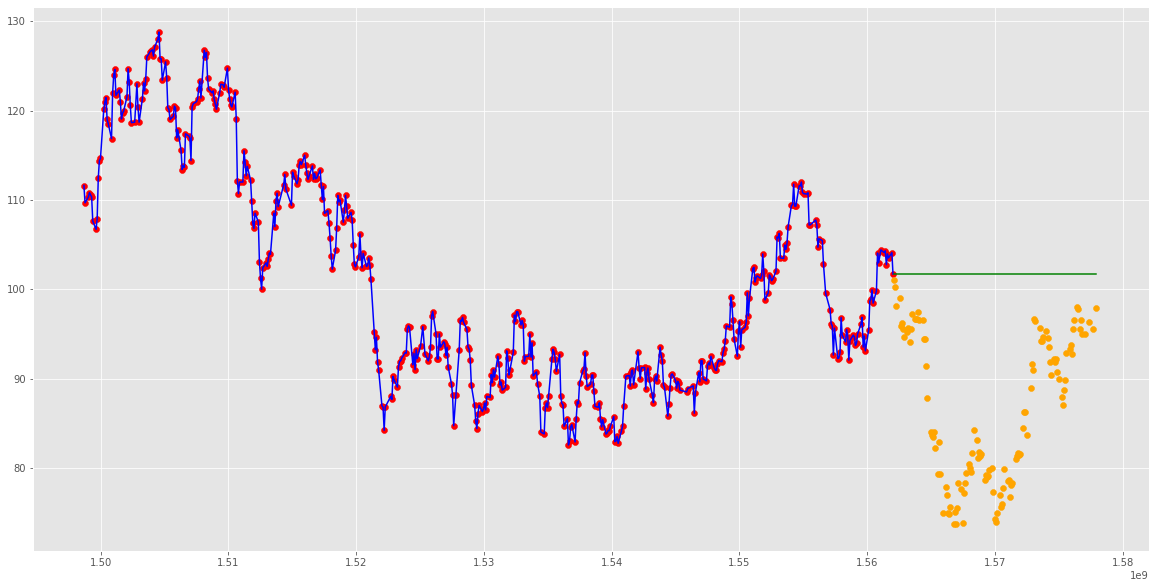

In [5]:
plt.scatter(X_prev, y_prev, color="red")
plt.scatter(X_next, y_next, color="orange")
plt.plot(X_prev, regressor.predict(X_prev), color="blue")
plt.plot(X_next, regressor.predict(X_next), color="green")